In [25]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import re
import os

import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
import IPython.display as ipd


# Function to get the HTML content of the page
def get_page_content(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad responses
    return response.content


# Function to parse the HTML and find the audio and text
def parse_page(content):
    soup = BeautifulSoup(content, "html.parser")
    audio_url = None
    # Find the script that contains the audio URL
    # script_tag = soup.find("script", text=re.compile(r"mp3"))
    # audio_url = None
    # if script_tag:
    #     # Extract the URL from the script tag text
    #     audio_url_match = re.search(r'https://[^"]+\.mp3', script_tag.string)
    #     if audio_url_match:
    #         audio_url = audio_url_match.group(0)

    # Find the text content
    text_container = soup.find("div", {"class": "chapter"})
    text_content = text_container.get_text(separator="\n") if text_container else None

    return audio_url, text_content


# Function to download the audio file
def download_audio(audio_url, filename):
    urllib.request.urlretrieve(audio_url, filename)


# Main function
def GetText(url,transcript_file):
    content = get_page_content(url)
    audio_url, text_content = parse_page(content)

    if audio_url:
        print(f"Audio URL: {audio_url}")
        download_audio(audio_url, "audio.mp3")
        print("Audio downloaded successfully.")
    # else:
    #     print("Audio not found.")

    if text_content:
        # print("Text content:")
        # print(text_content)
        with open(transcript_file, "w", encoding="utf-8") as file:
            file.write(text_content)
        print(f"Transcript saved to {transcript_file}")
    else:
        print("Text content not found.")

In [26]:
urls = [
    "https://live.bible.is/bible/HINDPI/MAT/",  # Matthew
    "https://live.bible.is/bible/HINDPI/MRK/",  # Mark
    "https://live.bible.is/bible/HINDPI/LUK/",  # Luke
    "https://live.bible.is/bible/HINDPI/JHN/",  # John
    "https://live.bible.is/bible/HINDPI/ACT/",  # Acts
    "https://live.bible.is/bible/HINDPI/ROM/",  # Romans
    "https://live.bible.is/bible/HINDPI/1CO/",  # 1Corinthians
    "https://live.bible.is/bible/HINDPI/2CO/",  # 2Corinthians
    "https://live.bible.is/bible/HINDPI/GAL/",  # Galatians
    "https://live.bible.is/bible/HINDPI/EPH/",  # Ephesians
    "https://live.bible.is/bible/HINDPI/PHP/",  # Philippians
    "https://live.bible.is/bible/HINDPI/COL/",  # Colossians
    "https://live.bible.is/bible/HINDPI/1TH/",  # 1Thess Thessalonians
    "https://live.bible.is/bible/HINDPI/2TH/",  # 2Thess Thessalonians
    "https://live.bible.is/bible/HINDPI/1TI/",  # 1Timothy
    "https://live.bible.is/bible/HINDPI/2TI/",  # 2Timothy
    "https://live.bible.is/bible/HINDPI/TIT/",  # Titus
    "https://live.bible.is/bible/HINDPI/PHM/",  # Philemon
    "https://live.bible.is/bible/HINDPI/HEB/",  # Hebrews
    "https://live.bible.is/bible/HINDPI/JAS/",  # James
    "https://live.bible.is/bible/HINDPI/1PE/",  # 1Peter
    "https://live.bible.is/bible/HINDPI/2PE/",  # 2Peter
    "https://live.bible.is/bible/HINDPI/1JN/",  # 1John
    "https://live.bible.is/bible/HINDPI/2JN/",  # 2John
    "https://live.bible.is/bible/HINDPI/3JN/",  # 3John
    "https://live.bible.is/bible/HINDPI/JUD/",  # Jude
    "https://live.bible.is/bible/HINDPI/REV/",  # Revelation
]

book_abbreviation = {
    "Matthew": "MAT",
    "Mark": "MRK",
    "Luke": "LUK",
    "John": "JHN",
    "Acts": "ACT",
    "Romans": "ROM",
    "1Corinthians": "1CO",
    "2Corinthians": "2CO",
    "Galatians": "GAL",
    "Ephesians": "EPH",
    "Philippians": "PHP",
    "Colossians": "COL",
    "1Thess": "1TH",
    "2Thess": "2TH",
    "1Timothy": "1TI",
    "2Timothy": "2TI",
    "Titus": "TIT",
    "Philemon": "PHM",
    "Hebrews": "HEB",
    "James": "JAS",
    "1Peter": "1PE",
    "2Peter": "2PE",
    "1John": "1JN",
    "2John": "2JN",
    "3John": "3JN",
    "Jude": "JUD",
    "Revelation": "REV",
}

In [27]:
def extract_book_name(filename):
    filename = filename[5:]

    suffix = "HINBCSN1DA.mp3"
    filename = filename[: -len(suffix)]
    filename = filename.rstrip("_")  # Remove trailing underscores
    filename = filename.lstrip("_")  # Remove preceeding underscores

    chapter, book = filename.split("_")
    chapter = str(chapter).lstrip('0')
    return chapter, book


def construct_url(chapter, book_name):
    return (
        f"https://live.bible.is/bible/HINDPI/{book_abbreviation[book_name]}/{chapter}"
    )


def construct_transcript_file_name(audio_file):
    """
    Audio file will be of type B01___01_Matthew_____HINBCSN1DA.mp3
    Text file will be of type B01___01_Matthew_____HINBCSN1DA.mp3
    """
    return audio_file.replace(".mp3", ".txt")

In [36]:
audio_dir = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama"
transcript_dir = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts"

os.makedirs(transcript_dir, exist_ok=True)

audio_files = os.listdir(audio_dir)

book_names = set()
book_to_chapter = {}

for audio_file in audio_files:
    print(audio_file)
    chapter, book_name = extract_book_name(audio_file)
    url = construct_url(chapter,book_name)
    transcript_file_name = construct_transcript_file_name(audio_file)
    transcript_file_name = os.path.join(transcript_dir,transcript_file_name)
    # if transcript file already exists, skip
    if not os.path.exists(transcript_file_name):
        
        GetText(url,transcript_file_name)

B04___18_John________HINBCSN1DA.mp3
B04___14_John________HINBCSN1DA.mp3
B12___02_Colossians__HINBCSN1DA.mp3
B27___12_Revelation__HINBCSN1DA.mp3
B04___21_John________HINBCSN1DA.mp3
B04___02_John________HINBCSN1DA.mp3
B21___05_1Peter______HINBCSN1DA.mp3
B13___04_1Thess______HINBCSN1DA.mp3
B20___04_James_______HINBCSN1DA.mp3
B27___04_Revelation__HINBCSN1DA.mp3
B27___08_Revelation__HINBCSN1DA.mp3
B01___08_Matthew_____HINBCSN1DA.mp3
B02___05_Mark________HINBCSN1DA.mp3
B05___17_Acts________HINBCSN1DA.mp3
B07___12_1CorinthiansHINBCSN1DA.mp3
B01___04_Matthew_____HINBCSN1DA.mp3
B02___09_Mark________HINBCSN1DA.mp3
B06___09_Romans______HINBCSN1DA.mp3
B05___22_Acts________HINBCSN1DA.mp3
B10___05_Ephesians___HINBCSN1DA.mp3
B06___05_Romans______HINBCSN1DA.mp3
B02___13_Mark________HINBCSN1DA.mp3
B09___03_Galatians___HINBCSN1DA.mp3
B08___03_2CorinthiansHINBCSN1DA.mp3
B19___02_Hebrews_____HINBCSN1DA.mp3
B03___23_Luke________HINBCSN1DA.mp3
B07___08_1CorinthiansHINBCSN1DA.mp3
B17___02_Titus_______HINBCSN

In [ ]:


def visualize_audio_by_bird(common_name, train_meta, audio_path):
    metadata = train_meta[train_meta["common_name"] == common_name]
    if metadata.empty:
        print(f"No data found for the bird species '{common_name}'.")
        return

    audio_file = metadata["filename"].iloc[0]
    audio_file_path = f"{audio_path}/{audio_file}"
    latitude = metadata["latitude"].iloc[0]
    longitude = metadata["longitude"].iloc[0]
    rating = metadata["rating"].iloc[0]
    author = metadata["author"].iloc[0]
    primary_label = metadata["primary_label"].iloc[0]
    type = metadata["type"].iloc[0]

    # Check if the coordinates are within the Western Ghats
    if not is_within_western_ghats(latitude, longitude):
        print(
            f"The bird species '{common_name}' does not have recordings in the Western Ghats."
        )
        return

    try:
        audio_data, sample_rate = librosa.load(audio_file_path)
    except FileNotFoundError:
        print(f"Audio file not found for the bird species '{common_name}'.")
        return

    # Play the audio
    print(f"Playing audio: {common_name}")
    ipd.display(ipd.Audio(audio_data, rate=sample_rate))

    # Create subplots for audio visualizations
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

    # Waveform
    axs[0, 0].plot(audio_data)
    axs[0, 0].set_title("Waveform")

    # Spectrogram
    spectrogram = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)
    librosa.display.specshow(
        spectrogram, sr=sample_rate, x_axis="time", y_axis="hz", ax=axs[0, 1]
    )
    axs[0, 1].set_title("Spectrogram")

    # Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    librosa.display.specshow(
        mel_spectrogram, x_axis="time", y_axis="mel", sr=sample_rate, ax=axs[1, 0]
    )
    axs[1, 0].set_title("Mel Spectrogram")

    # Chromagram
    chromagram = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
    librosa.display.specshow(
        chromagram, x_axis="time", y_axis="chroma", sr=sample_rate, ax=axs[1, 1]
    )
    axs[1, 1].set_title("Chromagram")

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate)
    librosa.display.specshow(mfccs, x_axis="time", sr=sample_rate, ax=axs[2, 0])
    axs[2, 0].set_title("MFCCs")

    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
    librosa.display.specshow(
        spectral_contrast, x_axis="time", sr=sample_rate, ax=axs[2, 1]
    )
    axs[2, 1].set_title("Spectral Contrast")

    # Add color bar to the spectrogram plot
    cbar = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1], format="%+2.0f dB")

    # Print metadata
    print(f"Common Name: {common_name}")
    print(f"Rating: {rating}")
    print(f"Primary Label: {primary_label}")
    print(f"Type: {type}")
    print(f"Author: {author}")
    print(f"Latitude: {latitude}")
    print(f"Longitude: {longitude}")

    # Plot recordings on map
    fig_map = px.scatter_mapbox(
        metadata,
        lat="latitude",
        lon="longitude",
        zoom=5,
        title="Recordings Map",
        hover_name="filename",
    )
    fig_map.update_layout(mapbox_style="open-street-map")
    fig_map.show()

In [40]:
def visualize_audio(audio_file):
    y, sr = librosa.load(audio_file)
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.show()

    # Plot the mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(
        librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis="mel", x_axis="time"
    )
    plt.colorbar(format="%+2.0f dB")
    plt.show()

    # Play the audio file
    ipd.Audio(audio_file)

audio_file = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama/40___01_Matthew_____HINBCSN1DA.mp3"
visualize_audio(audio_file)

/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/ipykernel_1554/3589557146.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/Users/Nishant/miniconda3/envs/sarvam/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama/40___01_Matthew_____HINBCSN1DA.mp3'

In [49]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.playback import play
import time
import numpy as np
import matplotlib.pyplot as plt

audio_file = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama/B27___20_Revelation__HINBCSN1DA.mp3"
sound_file = AudioSegment.from_mp3("/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama/B27___20_Revelation__HINBCSN1DA.mp3")

In [84]:
audio_chunks = split_on_silence(
    sound_file,
    # must be silent for at least half a second
    min_silence_len=600
    ,
    # consider it silent if quieter than -16 dBFS
    silence_thresh=-25,
)

# for i, chunk in enumerate(audio_chunks):

#     out_file = ".//splitAudio//chunk{0}.wav".format(i)
#     print("exporting ", out_file)
#     chunk.export(out_file, format="wav")

In [72]:
audio_chunks[10]

In [79]:
sound_file

In [89]:

def plot_waveform(audio):
    # Assuming you've already loaded the audio file using pydub
    # audio = AudioSegment.from_file("your_audio_file.mp3", format="mp3")

    # Convert audio to numpy array
    samples = np.array(audio.get_array_of_samples())

    # Check if audio is stereo and convert to mono if necessary
    if audio.channels == 2:
        samples = samples.reshape((-1, 2))
        samples = samples.mean(axis=1)

    # Create time array
    duration = audio.duration_seconds
    time = np.linspace(0, duration, num=len(samples))

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    plt.plot(time, samples)
    plt.title("Audio Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.ylim((-32768, 32767))  # Adjust if your audio has different bit depth
    plt.tight_layout()
    plt.show()

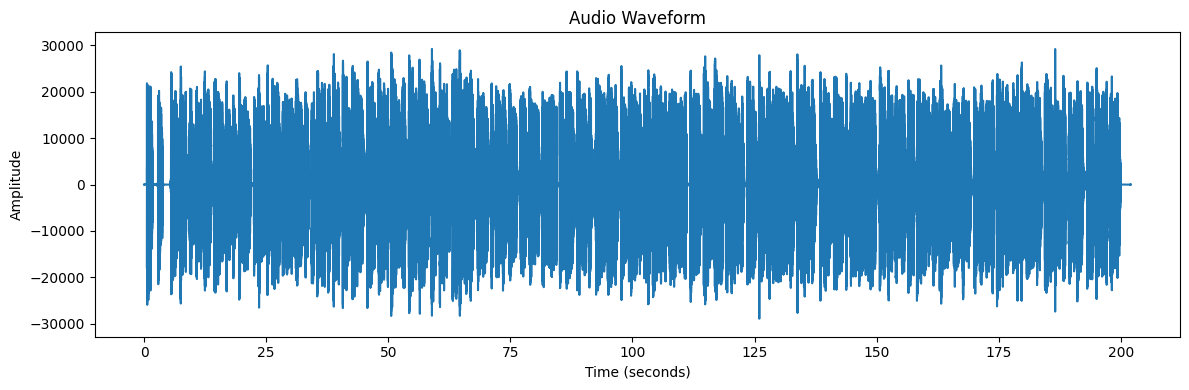

In [90]:
plot_waveform(sound_file)

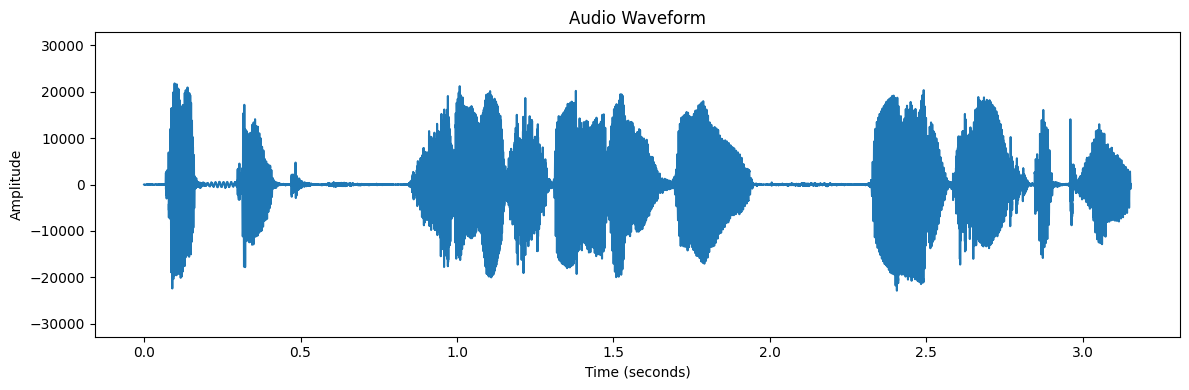

In [91]:
plot_waveform(audio_chunks[10])

In [92]:
audio_chunks[10]

In [88]:
audio_chunks[0]

In [85]:

for audio_chunk in audio_chunks:
    print(audio_chunk.duration_seconds)
    play(audio_chunk)
    time.sleep(0.5)

1.212


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmp6o_4ury1.wav':
  Duration: 00:00:01.21, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



0.912


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpovnt8cte.wav':
  Duration: 00:00:00.91, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



3.258


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmphaff4yzs.wav':
  Duration: 00:00:03.26, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



4.571


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpqd6os3b0.wav':
  Duration: 00:00:04.57, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



7.495


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpk57wi6h9.wav':
  Duration: 00:00:07.50, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



11.279


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpkymwd2ta.wav':
  Duration: 00:00:11.28, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



10.862


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmp41kzzfw5.wav':
  Duration: 00:00:10.86, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



16.976


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpuutk5cex.wav':
  Duration: 00:00:16.98, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



4.58


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpyaf2t771.wav':
  Duration: 00:00:04.58, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



2.316


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpzzasgv_s.wav':
  Duration: 00:00:02.32, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



3.153


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpak0a1odg.wav':
  Duration: 00:00:03.15, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



1.662


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmp5m3_p6fb.wav':
  Duration: 00:00:01.66, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



3.925


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmp7niqji2p.wav':
  Duration: 00:00:03.93, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



3.022


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpkqlnhvkk.wav':
  Duration: 00:00:03.02, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



3.076


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmp2taafic0.wav':
  Duration: 00:00:03.08, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s



3.159


Input #0, wav, from '/var/folders/d6/gqr_4fkx0hqbg4543bf562ym0000gp/T/tmpcw2z69ds.wav':
  Duration: 00:00:03.16, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 2 channels, s16, 768 kb/s


KeyboardInterrupt: 

# Cleaning up the transcripts

In [94]:
import re

new_transcript_dir = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts_new"

def clean_text(input_file, output_file):
    with open(input_file, "r", encoding="utf-8") as f:
        lines = f.readlines()

    cleaned_lines = []
    for line in lines:
        # Remove leading numbers and dots
        line = re.sub(r"^\s*\d+\s*", "", line)

        # Remove text within parentheses
        line = re.sub(r"\([^)]*\)", "", line)

        # Remove extra whitespace
        line = line.strip()

        if line:  # Only add non-empty lines
            cleaned_lines.append(line)

    with open(output_file, "w", encoding="utf-8") as f:
        f.write("\n".join(cleaned_lines))


# Usage
input_file = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts/B01___01_Matthew_____HINBCSN1DA.txt"  # Replace with your input file name
file_name = os.path.basename(input_file)
output_file = os.path.join(new_transcript_dir,file_name)  # Replace with your desired output file name

clean_text(input_file, output_file)
print(f"Cleaned text has been saved to {output_file}")

Cleaned text has been saved to /Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts_new/B01___01_Matthew_____HINBCSN1DA.txt


In [95]:
for file in os.listdir(transcript_dir):
    input_file = os.path.join(transcript_dir,file)
    output_file = os.path.join(new_transcript_dir,file)
    if not os.path.exists(output_file):
        clean_text(input_file, output_file)
        print(f"Cleaned text has been saved to {output_file}")


Cleaned text has been saved to /Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts_new/B15___03_1Timothy____HINBCSN1DA.txt
Cleaned text has been saved to /Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts_new/B21___01_1Peter______HINBCSN1DA.txt
Cleaned text has been saved to /Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts_new/B04___06_John________HINBCSN1DA.txt
Cleaned text has been saved to /Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts_new/B27___16_Revelation__HINBCSN1DA.txt
Cleaned text has been saved to /Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts_new/B04___10_John________HINBCSN1DA.txt
Cleaned text has been saved to /Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts_new/B01___23_Matthew_____HINBCSN1DA.txt
Cleaned text has been saved to /Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_N

In [96]:
len(os.listdir(new_transcript_dir))

260